# Installing spark

**In this cell we are installing pyspark and the necessary modules for its smooth working.**

In [53]:
!apt-get update > /dev/null
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://apache.osuosl.org/spark/spark-3.1.2/spark-3.1.2-bin-hadoop3.2.tgz

!tar xf spark-3.1.2-bin-hadoop3.2.tgz
#!pip install -q findspark
!pip install -q pyspark

**Defining the path for spark in the directory and initiating spark context**

In [54]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.2-bin-hadoop3.2"

In [55]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
sc = spark.sparkContext
sc

<SparkContext master=local[*] appName=pyspark-shell>

# Loading Data

**Data available at this link** : - https://archive.ics.uci.edu/ml/datasets/HCV+data

**Here we are importing the data and storing it into the data variable**

In [62]:
# Loading the data
data = spark.read.csv('/content/hcv_data.csv', header=True, inferSchema=True)

**Printing the schema which has been created**

In [63]:
data.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- Category: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Sex: string (nullable = true)
 |-- ALB: string (nullable = true)
 |-- ALP: string (nullable = true)
 |-- ALT: string (nullable = true)
 |-- AST: double (nullable = true)
 |-- BIL: double (nullable = true)
 |-- CHE: double (nullable = true)
 |-- CHOL: string (nullable = true)
 |-- CREA: double (nullable = true)
 |-- GGT: double (nullable = true)
 |-- PROT: string (nullable = true)



# Data Exploration

**Printing the data to see the first 20 records**

In [56]:
data.show()

+---+-------------+---+---+----+----+----+----+----+-----+----+-----+----+----+
|_c0|     Category|Age|Sex| ALB| ALP| ALT| AST| BIL|  CHE|CHOL| CREA| GGT|PROT|
+---+-------------+---+---+----+----+----+----+----+-----+----+-----+----+----+
|  1|0=Blood Donor| 32|  m|38.5|52.5| 7.7|22.1| 7.5| 6.93|3.23|106.0|12.1|  69|
|  2|0=Blood Donor| 32|  m|38.5|70.3|  18|24.7| 3.9|11.17| 4.8| 74.0|15.6|76.5|
|  3|0=Blood Donor| 32|  m|46.9|74.7|36.2|52.6| 6.1| 8.84| 5.2| 86.0|33.2|79.3|
|  4|0=Blood Donor| 32|  m|43.2|  52|30.6|22.6|18.9| 7.33|4.74| 80.0|33.8|75.7|
|  5|0=Blood Donor| 32|  m|39.2|74.1|32.6|24.8| 9.6| 9.15|4.32| 76.0|29.9|68.7|
|  6|0=Blood Donor| 32|  m|41.6|43.3|18.5|19.7|12.3| 9.92|6.05|111.0|91.0|  74|
|  7|0=Blood Donor| 32|  m|46.3|41.3|17.5|17.8| 8.5| 7.01|4.79| 70.0|16.9|74.5|
|  8|0=Blood Donor| 32|  m|42.2|41.9|35.8|31.1|16.1| 5.82| 4.6|109.0|21.5|67.1|
|  9|0=Blood Donor| 32|  m|50.9|65.5|23.2|21.2| 6.9| 8.69| 4.1| 83.0|13.7|71.3|
| 10|0=Blood Donor| 32|  m|42.4|86.3|20.

**Printing the data types of the columns in our data set**

In [57]:
data.dtypes

[('_c0', 'int'),
 ('Category', 'string'),
 ('Age', 'int'),
 ('Sex', 'string'),
 ('ALB', 'string'),
 ('ALP', 'string'),
 ('ALT', 'string'),
 ('AST', 'double'),
 ('BIL', 'double'),
 ('CHE', 'double'),
 ('CHOL', 'string'),
 ('CREA', 'double'),
 ('GGT', 'double'),
 ('PROT', 'string')]

In [58]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import sklearn
import seaborn as sns 
%matplotlib inline
sns.set()
import pyspark.ml

**Here we are depicting some statistical values for the columns of our data set to understand the count distribution of data, range and other statistical measures**

In [59]:
print('Data frame describe (string and numeric columns only):')
data.describe().toPandas().T

Data frame describe (string and numeric columns only):


,0,1,2,3,4
summary,count,mean,stddev,min,max
_c0,615,308.0,177.67948671695333,1,615
Category,615,None,None,0=Blood Donor,3=Cirrhosis
Age,615,47.40813008130081,10.055105445519239,19,77
Sex,615,None,None,f,m
ALB,615,41.62019543973941,5.780629404103076,14.9,NA
ALP,615,68.28391959798999,26.028315300123676,100.4,NA
ALT,615,28.45081433224754,25.469688813870942,0.9,NA
AST,615,34.78634146341462,33.09069033855156,10.6,324.0
BIL,615,11.396747967479675,19.673149805846588,0.8,254.0


**Checking for the presence of null values**

In [60]:
data.toPandas().isnull().sum()

_c0         0
Category    0
Age         0
Sex         0
ALB         0
ALP         0
ALT         0
AST         0
BIL         0
CHE         0
CHOL        0
CREA        0
GGT         0
PROT        0
dtype: int64

**Checking frequency of different categories in target variable**

In [61]:
data.groupBy('Category').count().show()

+--------------------+-----+
|            Category|count|
+--------------------+-----+
|       0=Blood Donor|  533|
|         3=Cirrhosis|   30|
|          2=Fibrosis|   21|
|0s=suspect Blood ...|    7|
|         1=Hepatitis|   24|
+--------------------+-----+



# Data Visualization

**Defining a new df variable and selecting and storing these above mention columns in it**

In [64]:
df = data.select('Age','Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT','Category')

**Visualizing the target variable categories bt count. We can see that it is maximum for Blood Donor**

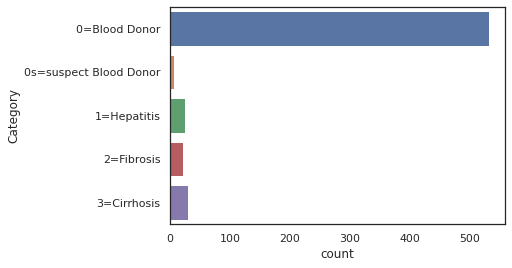

In [65]:
sns.set_style('white')
sns.countplot(y='Category', data=df.toPandas())

In [66]:
sex=df.select(['Sex']).toPandas()
category= df.select(['Category']).toPandas()
ast=df.select(['AST']).toPandas()
ggt=df.select(['GGT']).toPandas()
chol=df.select(['CHOL']).toPandas()
che=df.select(['CHE']).toPandas()
df_pan= df.toPandas()

**Visualizing the sex column in our data set. We can see that male percentage is higher than the female**

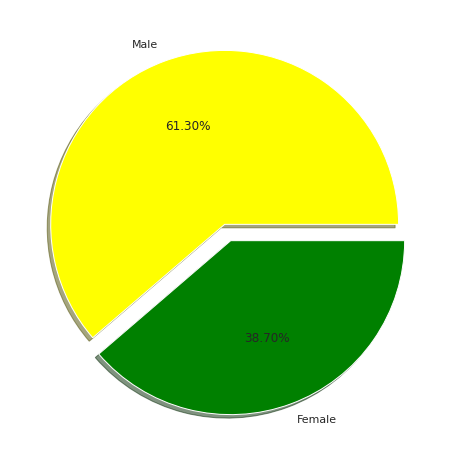

In [67]:

fig, ax = plt.subplots(figsize=(8,8))
plt.pie(x=sex.value_counts(), 
        colors=["yellow","green"], 
        labels=["Male","Female"], 
        shadow = True, 
        autopct="%1.2f%%", 
        explode = (0, 0.1)
        )
plt.show()

**On visualizing we can see that AST level is highest in Cirrhosis category**

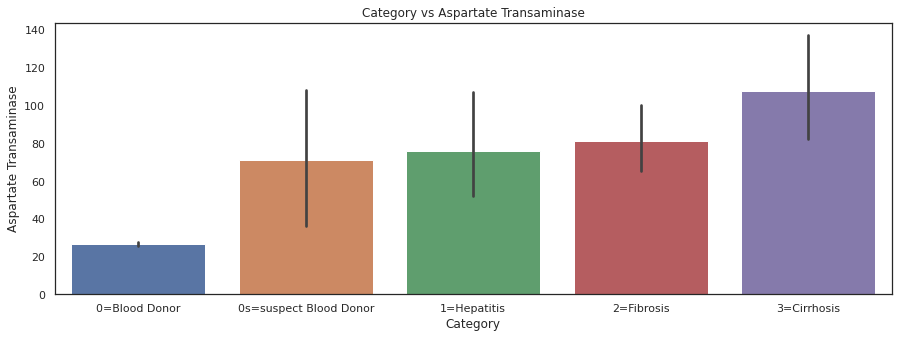

In [68]:
plt.figure(figsize=(15,5))
sns.barplot(x='Category',y='AST',data=df_pan)
plt.title('Category vs Aspartate Transaminase')
plt.xlabel('Category')
plt.ylabel('Aspartate Transaminase')
plt.show()

**On visualizing we can see that Gamma-Glutamyl Transferase level is highest in suspect blood donor category**

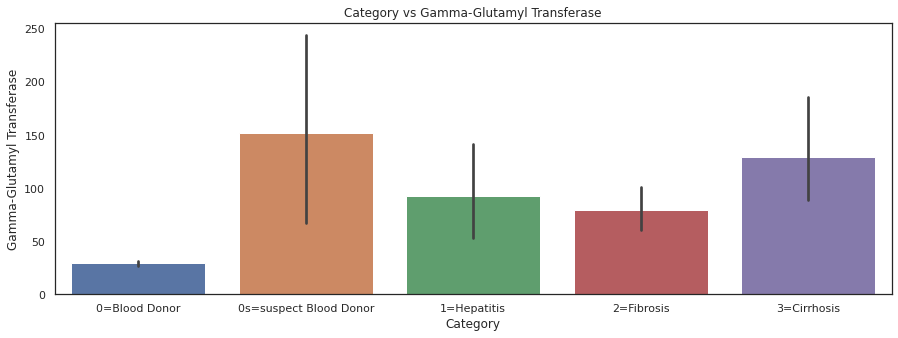

In [69]:
plt.figure(figsize=(15,5))
sns.barplot(x='Category',y='GGT',data=df_pan)
plt.title('Category vs Gamma-Glutamyl Transferase')
plt.xlabel('Category')
plt.ylabel('Gamma-Glutamyl Transferase')
plt.show()

**On visualizing we can see that Cholinesterase level is highest in Hepatitis category**

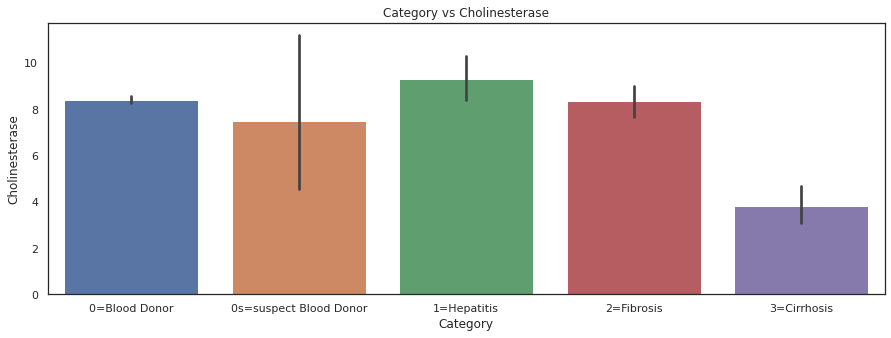

In [70]:
plt.figure(figsize=(15,5))
sns.barplot(x='Category',y='CHE',data=df_pan)
plt.title('Category vs Cholinesterase')
plt.xlabel('Category')
plt.ylabel('Cholinesterase')
plt.show()

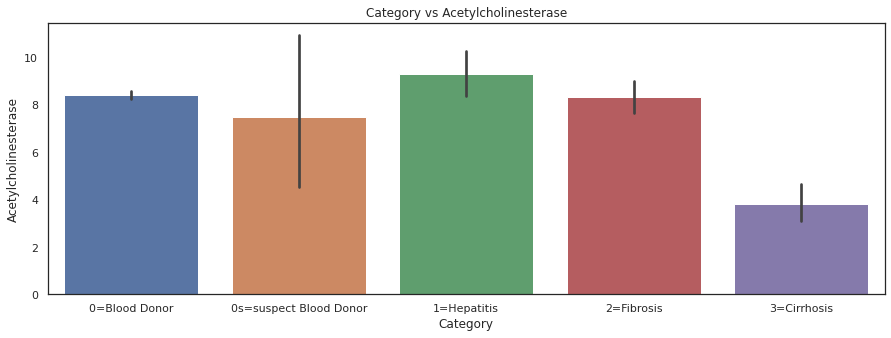

In [71]:
plt.figure(figsize=(15,5))
sns.barplot(x='Category',y='CHE',data=df_pan)
plt.title('Category vs Acetylcholinesterase')
plt.xlabel('Category')
plt.ylabel('Acetylcholinesterase')
plt.show()

# Data Pre-processing

In [72]:
from pyspark.ml.feature import VectorAssembler,StringIndexer

In [73]:
df.select('Sex').distinct().show()

+---+
|Sex|
+---+
|  m|
|  f|
+---+



**Here we are fitting the sex column for label encoding and converting it into gender column**

In [74]:
# Convert the string into numerical code
# label encoding
genderEncoder = StringIndexer(inputCol='Sex',outputCol='Gender').fit(df)

In [75]:
df = genderEncoder.transform(df)
df.show(4)

+---+---+----+----+----+----+----+-----+----+-----+----+----+-------------+------+
|Age|Sex| ALB| ALP| ALT| AST| BIL|  CHE|CHOL| CREA| GGT|PROT|     Category|Gender|
+---+---+----+----+----+----+----+-----+----+-----+----+----+-------------+------+
| 32|  m|38.5|52.5| 7.7|22.1| 7.5| 6.93|3.23|106.0|12.1|  69|0=Blood Donor|   0.0|
| 32|  m|38.5|70.3|  18|24.7| 3.9|11.17| 4.8| 74.0|15.6|76.5|0=Blood Donor|   0.0|
| 32|  m|46.9|74.7|36.2|52.6| 6.1| 8.84| 5.2| 86.0|33.2|79.3|0=Blood Donor|   0.0|
| 32|  m|43.2|  52|30.6|22.6|18.9| 7.33|4.74| 80.0|33.8|75.7|0=Blood Donor|   0.0|
+---+---+----+----+----+----+----+-----+----+-----+----+----+-------------+------+
only showing top 4 rows



**Here we are fitting the target column as wwll for label encoding and converting it.**

In [76]:
# Encoding for Category
# Label Encoding
catEncoder = StringIndexer(inputCol='Category',outputCol='Target').fit(df)
df = catEncoder.transform(df)

In [77]:
df.show(3)

+---+---+----+----+----+----+---+-----+----+-----+----+----+-------------+------+------+
|Age|Sex| ALB| ALP| ALT| AST|BIL|  CHE|CHOL| CREA| GGT|PROT|     Category|Gender|Target|
+---+---+----+----+----+----+---+-----+----+-----+----+----+-------------+------+------+
| 32|  m|38.5|52.5| 7.7|22.1|7.5| 6.93|3.23|106.0|12.1|  69|0=Blood Donor|   0.0|   0.0|
| 32|  m|38.5|70.3|  18|24.7|3.9|11.17| 4.8| 74.0|15.6|76.5|0=Blood Donor|   0.0|   0.0|
| 32|  m|46.9|74.7|36.2|52.6|6.1| 8.84| 5.2| 86.0|33.2|79.3|0=Blood Donor|   0.0|   0.0|
+---+---+----+----+----+----+---+-----+----+-----+----+----+-------------+------+------+
only showing top 3 rows



In [78]:
catEncoder.labels

['0=Blood Donor',
 '3=Cirrhosis',
 '1=Hepatitis',
 '2=Fibrosis',
 '0s=suspect Blood Donor']

**Checking the data types**

In [79]:
df.dtypes

[('Age', 'int'),
 ('Sex', 'string'),
 ('ALB', 'string'),
 ('ALP', 'string'),
 ('ALT', 'string'),
 ('AST', 'double'),
 ('BIL', 'double'),
 ('CHE', 'double'),
 ('CHOL', 'string'),
 ('CREA', 'double'),
 ('GGT', 'double'),
 ('PROT', 'string'),
 ('Category', 'string'),
 ('Gender', 'double'),
 ('Target', 'double')]

In [80]:
df2 = df.select('Age','Gender', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT', 'Target')

In [81]:
df2.printSchema()

root
 |-- Age: integer (nullable = true)
 |-- Gender: double (nullable = false)
 |-- ALB: string (nullable = true)
 |-- ALP: string (nullable = true)
 |-- ALT: string (nullable = true)
 |-- AST: double (nullable = true)
 |-- BIL: double (nullable = true)
 |-- CHE: double (nullable = true)
 |-- CHOL: string (nullable = true)
 |-- CREA: double (nullable = true)
 |-- GGT: double (nullable = true)
 |-- PROT: string (nullable = true)
 |-- Target: double (nullable = false)



**Here we are converting the df2 var into pandas df and replacing the NA values with 0 and changing the values to float data type**

In [82]:
df2 = df2.toPandas().replace('NA',0).astype(float)

In [83]:
type(df2)

pandas.core.frame.DataFrame

In [84]:
data_new = spark.createDataFrame(df2)
type(data_new)

pyspark.sql.dataframe.DataFrame

**Printing the new schema after preprocessing**

In [85]:
data_new.printSchema()

root
 |-- Age: double (nullable = true)
 |-- Gender: double (nullable = true)
 |-- ALB: double (nullable = true)
 |-- ALP: double (nullable = true)
 |-- ALT: double (nullable = true)
 |-- AST: double (nullable = true)
 |-- BIL: double (nullable = true)
 |-- CHE: double (nullable = true)
 |-- CHOL: double (nullable = true)
 |-- CREA: double (nullable = true)
 |-- GGT: double (nullable = true)
 |-- PROT: double (nullable = true)
 |-- Target: double (nullable = true)



In [86]:
required_features = ['Age','Gender', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT', 'Target']

**VectorAssembler basically combines a given list of columns into a single vector column**

In [87]:
# VectorAsm
vec_assembler = VectorAssembler(inputCols=required_features,outputCol='features')

In [88]:
vector = vec_assembler.transform(data_new)

In [89]:
vector.show(5)

+----+------+----+----+----+----+----+-----+----+-----+----+----+------+--------------------+
| Age|Gender| ALB| ALP| ALT| AST| BIL|  CHE|CHOL| CREA| GGT|PROT|Target|            features|
+----+------+----+----+----+----+----+-----+----+-----+----+----+------+--------------------+
|32.0|   0.0|38.5|52.5| 7.7|22.1| 7.5| 6.93|3.23|106.0|12.1|69.0|   0.0|[32.0,0.0,38.5,52...|
|32.0|   0.0|38.5|70.3|18.0|24.7| 3.9|11.17| 4.8| 74.0|15.6|76.5|   0.0|[32.0,0.0,38.5,70...|
|32.0|   0.0|46.9|74.7|36.2|52.6| 6.1| 8.84| 5.2| 86.0|33.2|79.3|   0.0|[32.0,0.0,46.9,74...|
|32.0|   0.0|43.2|52.0|30.6|22.6|18.9| 7.33|4.74| 80.0|33.8|75.7|   0.0|[32.0,0.0,43.2,52...|
|32.0|   0.0|39.2|74.1|32.6|24.8| 9.6| 9.15|4.32| 76.0|29.9|68.7|   0.0|[32.0,0.0,39.2,74...|
+----+------+----+----+----+----+----+-----+----+-----+----+----+------+--------------------+
only showing top 5 rows



# Machine Learning Models

**Here we are splitting the data set into train and test with 70% and 30% data respectively**

In [90]:
train_data,test_data = vector.randomSplit([0.7,0.3])

In [91]:
train_data.show(5)

+----+------+----+----+----+----+----+-----+----+-----+----+----+------+--------------------+
| Age|Gender| ALB| ALP| ALT| AST| BIL|  CHE|CHOL| CREA| GGT|PROT|Target|            features|
+----+------+----+----+----+----+----+-----+----+-----+----+----+------+--------------------+
|32.0|   0.0|38.5|52.5| 7.7|22.1| 7.5| 6.93|3.23|106.0|12.1|69.0|   0.0|[32.0,0.0,38.5,52...|
|32.0|   0.0|38.5|70.3|18.0|24.7| 3.9|11.17| 4.8| 74.0|15.6|76.5|   0.0|[32.0,0.0,38.5,70...|
|32.0|   0.0|39.2|74.1|32.6|24.8| 9.6| 9.15|4.32| 76.0|29.9|68.7|   0.0|[32.0,0.0,39.2,74...|
|32.0|   0.0|41.6|43.3|18.5|19.7|12.3| 9.92|6.05|111.0|91.0|74.0|   0.0|[32.0,0.0,41.6,43...|
|32.0|   0.0|42.2|41.9|35.8|31.1|16.1| 5.82| 4.6|109.0|21.5|67.1|   0.0|[32.0,0.0,42.2,41...|
+----+------+----+----+----+----+----+-----+----+-----+----+----+------+--------------------+
only showing top 5 rows



**From the pyspark.ml.classification module we are importing the models we are going to use.**
**In this case we are using Logistic Regression and Decision tree classifier**

In [92]:
from pyspark.ml.classification import LogisticRegression,DecisionTreeClassifier

In [93]:
L_reg = LogisticRegression(featuresCol='features',labelCol='Target')

**Fitting the train set data for the model to learn and later predicting on the validation set**

In [94]:
L_reg_model = L_reg.fit(train_data)

In [95]:
Predict_y = L_reg_model.transform(test_data)

# Evaluating Models

**From the module we are importing MulticlassClassificationEvaluator for the evaluation of model**

In [96]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [97]:
evaluator = MulticlassClassificationEvaluator(labelCol='Target',metricName='accuracy')

**Here we can see that our accuracy is around 98% which means model is doing good**

In [98]:
print('Accuracy')
evaluator.evaluate(Predict_y)

Accuracy


0.9890710382513661

In [99]:
from pyspark.mllib.evaluation import MulticlassMetrics

In [100]:
lr_metric = MulticlassMetrics(Predict_y['target', 'prediction'].rdd)

/usr/local/lib/python3.7/dist-packages/pyspark/sql/context.py:127: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  FutureWarning


**Here we can see that our recall, precision and F1 score is also good. So the model turns out to be good in terms of evaluations**

In [101]:
print("Precision - ",lr_metric.precision(1.0))
print("Recall - ",lr_metric.recall(1.0))
print("F1Score - ",lr_metric.fMeasure(1.0))

Precision -  0.9
Recall -  1.0
F1Score -  0.9473684210526316
